<a href="https://colab.research.google.com/github/sushant2076/Notes/blob/main/DL_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf                                              
from tensorflow import keras
import matplotlib.pyplot as plt                                                             
import numpy as np


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(y_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_test[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

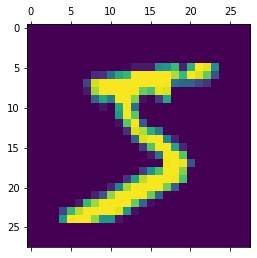

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [11]:
X_train.shape
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [13]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [14]:
from keras import layers
model = keras.Sequential([
    layers.Dense(10,input_shape=[784], activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_flattened,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 9s 3ms/step - loss: 0.4715 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3042 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2835 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9252


In [15]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2691 - accuracy: 0.9247


[0.2690689265727997, 0.9247000217437744]

In [16]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [17]:
y_predicted[0]

array([2.64591146e-02, 3.30821933e-07, 6.99196309e-02, 9.69582558e-01,
       2.90794438e-03, 9.45631191e-02, 1.70879196e-06, 9.99810398e-01,
       1.05521485e-01, 6.31112099e-01], dtype=float32)

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_test[0]

7

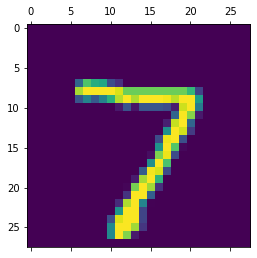

In [20]:
plt.matshow(X_test[0])

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [22]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

In [23]:
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    2,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   8,    9,  916,   19,   10,    3,   12,   11,   41,    3],
       [   2,    0,   17,  932,    0,   17,    2,   12,   22,    6],
       [   1,    1,    2,    1,  918,    0,   12,    4,   10,   33],
       [  10,    3,    2,   42,   10,  761,   16,    9,   33,    6],
       [  13,    3,    6,    1,    8,   11,  912,    2,    2,    0],
       [   1,    5,   21,    7,    7,    0,    0,  960,    5,   22],
       [   7,    9,    6,   24,   10,   22,    9,   12,  868,    7],
       [  11,    7,    1,   13,   31,    5,    0,   28,    8,  905]],
      dtype=int32)>

Text(33.0, 0.5, 'True')

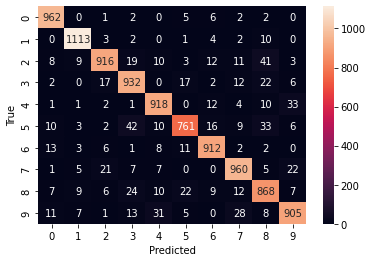

In [26]:
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")

In [31]:
from keras import layers
model = keras.Sequential([
    layers.Dense(100,input_shape=[784], activation = 'sigmoid'),
    layers.Dense(10, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_flattened,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4155 - accuracy: 0.8953
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2031 - accuracy: 0.9414
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1520 - accuracy: 0.9565
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1203 - accuracy: 0.9651
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0987 - accuracy: 0.9721


In [30]:
model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


array([[3.1885339e-03, 3.2714088e-05, 3.5318005e-01, ..., 9.9999440e-01,
        1.3155945e-03, 1.0321380e-02],
       [4.0383700e-02, 9.9913740e-01, 9.9999952e-01, ..., 6.7225763e-08,
        3.1038722e-01, 1.8003917e-07],
       [4.1027885e-04, 9.9044001e-01, 9.7013786e-02, ..., 2.2537802e-01,
        5.5619176e-02, 4.3575135e-03],
       ...,
       [3.4671009e-06, 1.5579491e-04, 3.5292944e-06, ..., 9.6755755e-01,
        1.5347338e-01, 9.1122371e-01],
       [1.7223991e-03, 4.0075911e-04, 6.9236623e-05, ..., 6.1100684e-02,
        9.7857416e-01, 5.7723559e-04],
       [5.6406561e-02, 1.7559720e-05, 1.0020485e-01, ..., 4.1595667e-05,
        8.9514695e-05, 5.9743011e-03]], dtype=float32)

In [32]:
model.evaluate(X_train_flattened,y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0841 - accuracy: 0.9768


[0.08413582295179367, 0.9767500162124634]

In [35]:
from keras import layers
model = keras.Sequential([
    layers.Flatten(input_shape= (28,28)),
    layers.Dense(100,input_shape=[784], activation = 'sigmoid'),
    layers.Dense(10, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4208 - accuracy: 0.8926
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2051 - accuracy: 0.9414
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1527 - accuracy: 0.9559
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1203 - accuracy: 0.9657
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0979 - accuracy: 0.9719
